In [ ]:
#5 percent - 64-128-128-64
#4.5 percent - 64-64 - 3.15 - 0.944
#4.7 percent - 64-128-256-128-64- 0.979
#4.9 percent - 6-32-32-1 0.977
#5.8 percent - 6-32-64-64-32-1 

In [1]:
import sklearn

In [2]:
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers import Dense, Input
from keras.models import Model
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import glob
import os
import math
from random import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
data = pd.read_csv('data_1.csv',delimiter=",")
test_data = pd.read_csv('test_data.csv',delimiter=",")

#data = pd.read_csv('/content/drive/MyDrive/Education/PEH_Project_AIAA/data_files/train_data.csv',delimiter=",")
data = data[['FT', 'T', 'CS', 'CO']]
data1 = data.copy()
data = data.dropna()
data1 = data1.dropna()
data.shape

(448, 4)

In [4]:
scaler_lat = MinMaxScaler()
scaler_temp = MinMaxScaler()
scaler_crack = MinMaxScaler()
scaler_fs = MinMaxScaler()
scaler_co = MinMaxScaler()
data.FT = scaler_lat.fit_transform(data[['FT']])
data.CO = scaler_co.fit_transform(data[['CO']])
data.CS = scaler_crack.fit_transform(data[['CS']])
#data.FS = scaler_fs.fit_transform(data[['FS']])
data.T = scaler_temp.fit_transform(data[['T']])
#test_data.LO = scaler_lat.transform(test_data[['LO']])
#test_data.CS = scaler_crack.transform(test_data[['CS']])
#test_data.FS = scaler_fs.transform(test_data[['FS']])
#test_data.T = scaler_temp.transform(test_data[['T']])

In [5]:
data.to_csv('new_data.csv')
train, test = train_test_split(data, test_size=0.2, random_state = 1)
train_or, test_or = train_test_split(data1, test_size=0.2, random_state = 1)

In [6]:
test.head()

,FT,T,CS,CO
189,0.107658,0.583333,0.50000,0.4
294,0.189787,0.166667,0.25000,0.6
185,0.130932,0.250000,0.50000,0.4
31,0.269044,0.416667,0.06250,0.0
260,0.364768,0.916667,0.03125,0.6


In [7]:
test_or.head()

,FT,T,CS,CO
189,39.612,700,0.400,30
294,59.860,200,0.200,45
185,45.350,300,0.400,30
31,79.400,500,0.050,0
260,103.000,1100,0.025,45


In [8]:
test_x = test[['T', 'CS', 'CO']]
test_y = test['FT']
train_x = train[['T', 'CS', 'CO']]
train_y = train['FT']

In [9]:
train_x.head(10)

,T,CS,CO
261,1.000000,0.03125,0.600000
463,0.000000,0.12500,0.733333
275,0.916667,0.06250,0.600000
80,0.166667,0.50000,0.000000
46,0.583333,0.12500,0.000000
214,0.500000,0.75000,0.400000
343,0.500000,0.62500,0.600000
85,0.583333,0.50000,0.000000
345,0.625000,0.62500,0.600000
81,0.250000,0.50000,0.000000


In [21]:
model = Sequential([
    Dense(units=8,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=1, activation = 'sigmoid'),
    ])

In [22]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_absolute_error', metrics = ['mae', 'mse'])
history = model.fit(train_x,train_y,epochs=150,batch_size= 2, verbose = 1, shuffle = False)
y_pred = model.predict(test_x)

Epoch 1/150
179/179 [==============================] - 1s 2ms/step - loss: 0.2393 - mae: 0.2393 - mse: 0.0749
Epoch 2/150
179/179 [==============================] - 0s 2ms/step - loss: 0.0631 - mae: 0.0631 - mse: 0.0199
Epoch 3/150
179/179 [==============================] - 0s 2ms/step - loss: 0.0543 - mae: 0.0543 - mse: 0.0183
Epoch 4/150
179/179 [==============================] - 0s 2ms/step - loss: 0.0512 - mae: 0.0512 - mse: 0.0172
Epoch 5/150
179/179 [==============================] - 0s 2ms/step - loss: 0.0497 - mae: 0.0497 - mse: 0.0164
Epoch 6/150
179/179 [==============================] - 0s 1ms/step - loss: 0.0487 - mae: 0.0487 - mse: 0.0158
Epoch 7/150
179/179 [==============================] - 0s 1ms/step - loss: 0.0473 - mae: 0.0473 - mse: 0.0153
Epoch 8/150
179/179 [==============================] - 0s 2ms/step - loss: 0.0459 - mae: 0.0459 - mse: 0.0148
Epoch 9/150
179/179 [==============================] - 0s 1ms/step - loss: 0.0444 - mae: 0.0444 - mse: 0.0143
Epoch 10/1

179/179 [==============================] - 0s 2ms/step - loss: 0.0090 - mae: 0.0090 - mse: 3.9094e-04
Epoch 145/150
179/179 [==============================] - 0s 2ms/step - loss: 0.0092 - mae: 0.0092 - mse: 4.5727e-04
Epoch 146/150
179/179 [==============================] - 0s 2ms/step - loss: 0.0086 - mae: 0.0086 - mse: 3.7040e-04
Epoch 147/150
179/179 [==============================] - 0s 2ms/step - loss: 0.0081 - mae: 0.0081 - mse: 2.8122e-04
Epoch 148/150
179/179 [==============================] - 0s 2ms/step - loss: 0.0086 - mae: 0.0086 - mse: 3.3032e-04
Epoch 149/150
179/179 [==============================] - 0s 2ms/step - loss: 0.0089 - mae: 0.0089 - mse: 3.8429e-04
Epoch 150/150
179/179 [==============================] - 0s 2ms/step - loss: 0.0088 - mae: 0.0088 - mse: 4.0463e-04


150


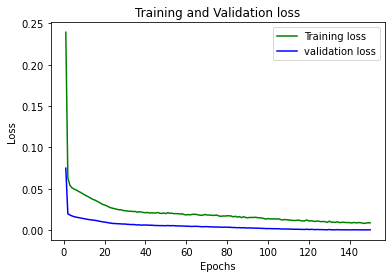

In [23]:
loss_train = history.history['loss']
loss_val = history.history['mse']
epochs = range(1,151)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))

0.008417648291457368 0.99026628339425


In [25]:
model.evaluate(test_x, test_y, batch_size = 4)

23/23 [==============================] - 0s 1ms/step - loss: 0.0084 - mae: 0.0084 - mse: 2.7420e-04


[0.008417649194598198, 0.008417649194598198, 0.00027419516118243337]

In [26]:
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_lat.inverse_transform(y_pred)
y_test_in = scaler_lat.inverse_transform(test_y_np)
print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

2.0752867810397686 0.9902662815883576


In [28]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test_in, y_pred_in)*100

3.747697126643352

In [19]:
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.0001), metrics = ['mae', 'mse'])
    return model


estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=2, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator,X= train_x, y = train_y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at whi

Baseline: 0.77 (0.13) MSE


In [20]:
results

array([0.60593947, 0.9066945 , 0.75079788, 0.97744708, 0.71650072,
       0.97953158, 0.6297765 , 0.74914821, 0.69842834, 0.72872953])

In [35]:
model = baseline_model()
history = model.fit(train_x,train_y,epochs=200,batch_size= 1, verbose = 1, shuffle = True)

Epoch 1/200


ValueError: in user code:

    File "D:\ananconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "D:\ananconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\ananconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "D:\ananconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "D:\ananconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\ananconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_35" is incompatible with the layer: expected shape=(None, 4), found shape=(1, 3)


In [1]:
from sklearn.utils.metaestimators import available_if

ModuleNotFoundError: No module named 'sklearn.utils.metaestimators'

In [19]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, train_x, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[nan nan nan nan nan nan nan nan nan nan]
Accuracy: nan (nan)


In [64]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m] 
    t.append(k)
t = np.array(t)
#print(t)

In [65]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test_in, y_pred_in)

0.10850842446333683

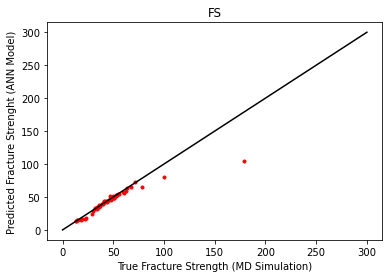

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,300], [0, 300], color = 'black')
plt.show()

In [30]:
model_json = model.to_json()
with open("model_1_e.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_1_e.h5")
print("Saved model to disk")

Saved model to disk


In [31]:
from keras.models import model_from_json
json_file = open('model_1_e.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_1_e.h5")
print("Loaded model from disk")

Loaded model from disk


In [33]:
y_pred = loaded_model.predict(test_x)
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_lat.inverse_transform(y_pred)
y_test_in = scaler_lat.inverse_transform(test_y_np)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test_in, y_pred_in))
print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

0.008417648291457368 0.99026628339425
0.03747697126643352
2.0752867810397686 0.9902662815883576


In [46]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 32)                224       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,639
Trainable params: 8,639
Non-trainabl

In [141]:
test_x_in = test_x.copy()
test_x_in.LO = scaler_lat.inverse_transform(test_x_in[['LO']])
test_x_in.CS = scaler_crack.inverse_transform(test_x_in[['CS']])
test_x_in.T = scaler_temp.inverse_transform(test_x_in[['T']]) 

In [142]:
test_x_in

,LO,T,CS
26,0.0,300.0,0.8
86,13.9,600.0,0.5
54,13.9,0.0,0.0
12,0.0,100.0,0.3
65,13.9,100.0,0.2
50,0.0,1200.0,0.5
49,0.0,1200.0,0.4
40,0.0,900.0,0.4
68,13.9,100.0,0.5
20,0.0,300.0,0.2


In [64]:
test_x = test_data[['LO', 'T', 'CS']]
test_y = test_data['FS']
train_x = data[['LO', 'T', 'CS']]
train_y = data['FS']